In [1]:
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable)
import socket
print(socket.gethostname())
import os
os.chdir("/home/icb/alioguz.can/projects/4i_tests")
sys.path.append("/home/icb/alioguz.can/projects/4i_tests/cellseg")

import numpy as np
import matplotlib.pyplot as plt

/home/icb/alioguz.can/miniconda3/envs/microscopy_pipeline/bin/python
gpusrv27.scidom.de


In [3]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tiff

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 206
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: VL Whole Slide Microscopy Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.36533.1592234914724322466371556613121619813816147
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 2.16.840.1
(0002,0013) Implementation Version Name         SH: 'SAM_1_2_0'
(0002,0016) Source Application Entity Title     AE: 'Segue_SCU'
-------------------------------------------------
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'VOLUME', 'RESAMPLED']
(0008,0016) SOP Class UID                       UI: VL Whole Slide Microscopy Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.36533.1592234914724322466371556613121619813816147
(

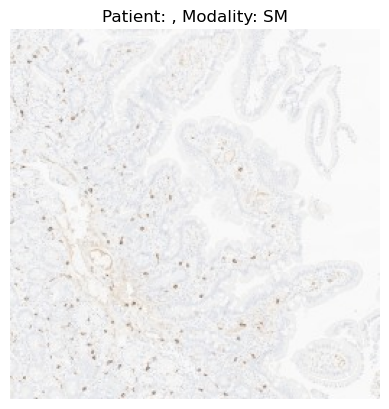

In [13]:
# Load DICOM file
dicom_path = "/home/icb/alioguz.can/projects/4i_tests/notebooks/he_slides/1.3.6.1.4.1.36533.1592234914724322466371556613121619813816147.dcm"
ds = pydicom.dcmread(dicom_path)

# Show metadata
print(ds)

# Extract pixel data as numpy array
image = ds.pixel_array.astype(float)

# Normalize image for display
image = (np.maximum(image, 0) / image.max()) * 255.0
image = np.uint8(image)

# Plot
plt.imshow(image[150], cmap="gray")
plt.title(f"Patient: {ds.PatientName}, Modality: {ds.Modality}")
plt.axis("off")
plt.show()

In [34]:
image.shape

(221, 256, 256, 3)

In [ ]:
red_img = image[:,:,:,0]
green_img = image[:,:,:,0]
red_img = image[:,:,:,0]

In [21]:
std_arr = image[:,:,:,2].std(axis=(1,2))

In [32]:
np.where(std_arr > 8)

(array([ 37,  53,  54,  55,  70,  71, 149, 150, 165, 166, 167, 193]),)

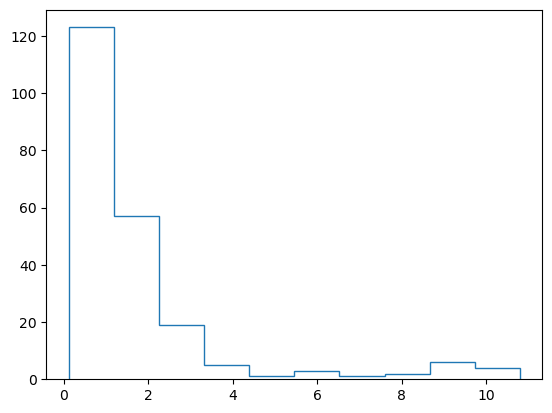

In [27]:
counts, bins = np.histogram(std_arr)
plt.stairs(counts, bins)

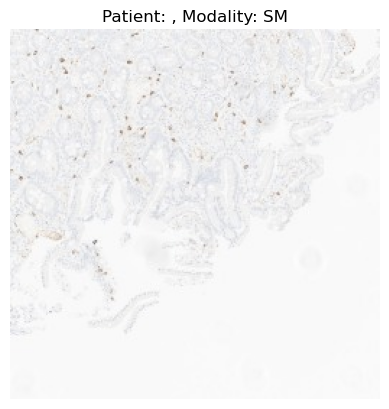

In [38]:
# Plot
plt.imshow(image[167], cmap="gray")
plt.title(f"Patient: {ds.PatientName}, Modality: {ds.Modality}")
plt.axis("off")
plt.show()